In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import ast

### Process b3a_cov.dta

In [3]:
b3a_cov = pd.read_stata('adult_a/b3a_cov.dta')
b3a_cov

,hhid14_9,pid14,idivwr,resvis,rspndnt,panel,age,marstat,sex,dob_day,...,birth_cert_reas,hhid14,stemid,pid,pidlink,cp1,cp2,cp3,version,module
0,001060000,1.0,A35,1:Yes,1:Head of household,3:New,59.0,2:Married,1:Male,5.0,...,5:Didn't know it was required,0010600,00106,1.0,001060001,CF,2:Good,2:Good,1.3,B3A_COV
1,001060004,1.0,A34,1:Yes,2:Spouse of head,3:New,28.0,2:Married,3:Female,98:Don't Know,...,7:Cannot show if asked /misplaced birth certif...,0010651,00106,1.0,001060004,BD,3:Fair,3:Fair,1.3,B3A_COV
2,001060000,7.0,A33,1:Yes,2:Spouse of head,3:New,39.0,2:Married,3:Female,7.0,...,NaN,0010600,00106,7.0,001060007,BCD,1:Excellent,1:Excellent,1.3,B3A_COV
3,001060000,8.0,A33,1:Yes,3:Other HH member,3:New,16.0,1:Not yet married,3:Female,9.0,...,NaN,0010600,00106,8.0,001060008,EF,1:Excellent,1:Excellent,1.3,B3A_COV
4,001060004,2.0,A35,1:Yes,1:Head of household,3:New,30.0,2:Married,1:Male,4.0,...,5:Didn't know it was required,0010651,00106,2.0,001065102,BD,2:Good,2:Good,1.3,B3A_COV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36386,321291100,3.0,W33,1:Yes,3:Other HH member,3:New,20.0,1:Not yet married,3:Female,24.0,...,NaN,3212911,32129,3.0,321291103,CE,1:Excellent,1:Excellent,1.3,B3A_COV
36387,321291100,4.0,W33,1:Yes,3:Other HH member,3:New,19.0,1:Not yet married,1:Male,10.0,...,NaN,3212911,32129,4.0,321291104,E,1:Excellent,1:Excellent,1.3,B3A_COV
36388,321300000,1.0,W31,1:Yes,1:Head of household,1:Panel,48.0,2:Married,1:Male,5.0,...,NaN,3213000,32130,1.0,321300001,A,2:Good,2:Good,1.3,B3A_COV
36389,321300000,2.0,W32,1:Yes,2:Spouse of head,1:Panel,58.0,2:Married,3:Female,20.0,...,NaN,3213000,32130,2.0,321300002,F,2:Good,2:Good,1.3,B3A_COV


In [4]:
b3a_cov_clean = b3a_cov[['pidlink', 'marstat', 'age', 'sex']]
b3a_cov_clean

,pidlink,marstat,age,sex
0,001060001,2:Married,59.0,1:Male
1,001060004,2:Married,28.0,3:Female
2,001060007,2:Married,39.0,3:Female
3,001060008,1:Not yet married,16.0,3:Female
4,001065102,2:Married,30.0,1:Male
...,...,...,...,...
36386,321291103,1:Not yet married,20.0,3:Female
36387,321291104,1:Not yet married,19.0,1:Male
36388,321300001,2:Married,48.0,1:Male
36389,321300002,2:Married,58.0,3:Female


In [5]:
values_drop = ['1:Not yet married', '6:Cohabitate']
b3a_cov_clean = b3a_cov_clean[~b3a_cov_clean['marstat'].isin(values_drop)]
b3a_cov_clean

,pidlink,marstat,age,sex
0,001060001,2:Married,59.0,1:Male
1,001060004,2:Married,28.0,3:Female
2,001060007,2:Married,39.0,3:Female
4,001065102,2:Married,30.0,1:Male
5,001080003,2:Married,36.0,1:Male
...,...,...,...,...
36381,321290003,2:Married,44.0,3:Female
36382,321290004,2:Married,45.0,1:Male
36383,321290005,2:Married,39.0,1:Male
36388,321300001,2:Married,48.0,1:Male


In [8]:
b3a_cov_clean = b3a_cov_clean.dropna()
b3a_cov_clean

,pidlink,marstat,age,sex
0,001060001,2:Married,59.0,1:Male
1,001060004,2:Married,28.0,3:Female
2,001060007,2:Married,39.0,3:Female
4,001065102,2:Married,30.0,1:Male
5,001080003,2:Married,36.0,1:Male
...,...,...,...,...
36381,321290003,2:Married,44.0,3:Female
36382,321290004,2:Married,45.0,1:Male
36383,321290005,2:Married,39.0,1:Male
36388,321300001,2:Married,48.0,1:Male


In [12]:
b3a_cov_clean.to_csv('clean_data/b3a_cov_clean.csv', index=False)

In [45]:
b3a_cov_clean['sex'].value_counts()

sex
3:Female    15864
1:Male      13299
Name: count, dtype: int64

In [46]:
b3a_cov_clean['marstat'].value_counts()

marstat
2:Married            25800
5:Widowed             2366
4:Divorced             819
3:Separated            178
1:Not yet married        0
6:Cohabitate             0
Name: count, dtype: int64

In [2]:
b3a_cov_clean = pd.read_csv('clean_data/b3a_cov_clean.csv')
b3a_cov_clean

,pidlink,marstat,age,sex
0,1060001,2:Married,59.0,1:Male
1,1060004,2:Married,28.0,3:Female
2,1060007,2:Married,39.0,3:Female
3,1065102,2:Married,30.0,1:Male
4,1080003,2:Married,36.0,1:Male
...,...,...,...,...
29158,321290003,2:Married,44.0,3:Female
29159,321290004,2:Married,45.0,1:Male
29160,321290005,2:Married,39.0,1:Male
29161,321300001,2:Married,48.0,1:Male


In [7]:
pd.set_option('display.min_rows', None)

In [3]:
b3a_cov_clean['age'].value_counts()

32.0     1028
33.0      969
34.0      948
31.0      948
35.0      936
         ... 
99.0        1
110.0       1
14.0        1
107.0       1
109.0       1
Name: age, Length: 91, dtype: int64

In [6]:
b3a_cov_clean = b3a_cov_clean[b3a_cov_clean['age'] != "998:Don't Know"]
b3a_cov_clean

,pidlink,marstat,age,sex
0,1060001,2:Married,59.0,1:Male
1,1060004,2:Married,28.0,3:Female
2,1060007,2:Married,39.0,3:Female
3,1065102,2:Married,30.0,1:Male
4,1080003,2:Married,36.0,1:Male
...,...,...,...,...
29158,321290003,2:Married,44.0,3:Female
29159,321290004,2:Married,45.0,1:Male
29160,321290005,2:Married,39.0,1:Male
29161,321300001,2:Married,48.0,1:Male


In [8]:
b3a_cov_clean['age'] = b3a_cov_clean['age'].astype(int)
b3a_cov_clean

C:\Users\ideap\AppData\Local\Temp\ipykernel_22932\3731149357.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b3a_cov_clean['age'] = b3a_cov_clean['age'].astype(int)


,pidlink,marstat,age,sex
0,1060001,2:Married,59,1:Male
1,1060004,2:Married,28,3:Female
2,1060007,2:Married,39,3:Female
3,1065102,2:Married,30,1:Male
4,1080003,2:Married,36,1:Male
...,...,...,...,...
29158,321290003,2:Married,44,3:Female
29159,321290004,2:Married,45,1:Male
29160,321290005,2:Married,39,1:Male
29161,321300001,2:Married,48,1:Male


In [10]:
b3a_cov_clean['age'].describe()

count    29159.000000
mean        42.456497
std         14.875299
min         14.000000
25%         31.000000
50%         39.000000
75%         52.000000
max        110.000000
Name: age, dtype: float64

In [11]:
b3a_cov_clean['sex'].value_counts()

3:Female    15862
1:Male      13297
Name: sex, dtype: int64

In [13]:
b3a_cov_clean['sex'].value_counts(normalize=True)

3:Female    0.543983
1:Male      0.456017
Name: sex, dtype: float64

### Process b3a_dl1.dta

In [47]:
b3a_dl1 = pd.read_stata('adult_a/b3a_dl1.dta')
b3a_dl1

,hhid14_9,pid14,dl01a,dl01f,dl01g,dl01h,dl01e,dl02,dl02a,dl03,...,dl16xd,dl30,dl40,dl41,dl42,dl43,hhid14,pidlink,version,module
0,001060000,1.0,N,M,M,M,13:Nias,1:Yes,1:Yes,1:Yes,...,NaN,NaN,,NaN,NaN,,0010600,001060001,1.3,B3A_DL1
1,001060004,1.0,N,M,M,M,96:None,1:Yes,1:Yes,1:Yes,...,2:New respondent,3:No,,NaN,NaN,,0010651,001060004,1.3,B3A_DL1
2,001060000,7.0,N,M,M,M,13:Nias,3:No,3:No,3:No,...,2:New respondent,3:No,,NaN,NaN,,0010600,001060007,1.3,B3A_DL1
3,001060000,8.0,WN,M,M,M,13:Nias,1:Yes,1:Yes,1:Yes,...,2:New respondent,1:Yes,A,3:No,3:No,,0010600,001060008,1.3,B3A_DL1
4,001060004,2.0,N,M,M,M,13:Nias,1:Yes,1:Yes,1:Yes,...,2:New respondent,3:No,,NaN,NaN,,0010651,001065102,1.3,B3A_DL1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34459,321291100,3.0,WM,L,L,L,12:Makassar,1:Yes,3:No,1:Yes,...,2:New respondent,1:Yes,C,3:No,3:No,,3212911,321291103,1.3,B3A_DL1
34460,321291100,4.0,WM,L,L,L,12:Makassar,1:Yes,1:Yes,1:Yes,...,2:New respondent,1:Yes,A,1:Yes,3:No,,3212911,321291104,1.3,B3A_DL1
34461,321300000,1.0,WM,L,L,L,12:Makassar,1:Yes,3:No,1:Yes,...,3:Panel Respondent left school before June 2007,NaN,,NaN,NaN,,3213000,321300001,1.3,B3A_DL1
34462,321300000,2.0,WM,E,E,L,12:Makassar,1:Yes,1:Yes,1:Yes,...,NaN,NaN,,NaN,NaN,,3213000,321300002,1.3,B3A_DL1


In [48]:
b3a_dl1_clean = b3a_dl1[['pidlink', 'dl01f', 'dl06']]
b3a_dl1_clean

,pidlink,dl01f,dl06
0,001060001,M,2:Elementary school
1,001060004,M,2:Elementary school
2,001060007,M,2:Elementary school
3,001060008,M,3:Junior high general
4,001065102,M,3:Junior high general
...,...,...,...
34459,321291103,L,"60:College (D1,D2,D3)"
34460,321291104,L,61:University S1
34461,321300001,L,6:Senior high vocational
34462,321300002,E,5:Senior high general


In [49]:
b3a_dl1_clean = b3a_dl1_clean.dropna()
b3a_dl1_clean

,pidlink,dl01f,dl06
0,001060001,M,2:Elementary school
1,001060004,M,2:Elementary school
2,001060007,M,2:Elementary school
3,001060008,M,3:Junior high general
4,001065102,M,3:Junior high general
...,...,...,...
34459,321291103,L,"60:College (D1,D2,D3)"
34460,321291104,L,61:University S1
34461,321300001,L,6:Senior high vocational
34462,321300002,E,5:Senior high general


In [13]:
b3a_dl1_clean.to_csv('clean_data/b3a_dl1_clean.csv', index=False)

In [23]:
b3a_dl1_clean = pd.read_csv('clean_data/b3a_dl1_clean.csv')
b3a_dl1_clean

,pidlink,dl06
0,1060001,2:Elementary school
1,1060004,2:Elementary school
2,1060007,2:Elementary school
3,1060008,3:Junior high general
4,1065102,3:Junior high general
...,...,...
32672,321291103,"60:College (D1,D2,D3)"
32673,321291104,61:University S1
32674,321300001,6:Senior high vocational
32675,321300002,5:Senior high general


In [47]:
b3a_dl1_clean['dl01f'].value_counts()

A       13226
B        3836
         2236
I        1677
D        1351
        ...  
J Q         1
B E1        1
B I         1
N Q         1
B L         1
Name: dl01f, Length: 85, dtype: int64

In [45]:
b3a_dl1_clean['dl06'].value_counts()

2:Elementary school                                    9896
5:Senior high general                                  5341
3:Junior high general                                  5124
6:Senior high vocational                               4546
61:University S1                                       3192
60:College (D1,D2,D3)                                  1226
73:Islamic Junior/High School (Madrasah Tsanawiyah)    1100
74:Islamic Senior/High School (Madrasah Tsanawiyah)     909
72:Islamic Elementary School (Madrasah Ibtidaiyah)      403
15:Adult education C                                    240
4:Junior high vocational                                206
62:University S2                                        202
12:Adult education B                                    108
14:Islamic School (pesantren)                            78
13:Open university                                       28
11:Adult education A                                     22
95:Other                                

In [52]:
education_mapping = {
    '2:Elementary school': 6,
    '5:Senior high general': 12, # 6 (SD) + 3 (SMP) + 3 (SMA)
    '3:Junior high general': 9,  # 6 (SD) + 3 (SMP)
    '6:Senior high vocational': 13,
    '61:University S1': 16, # 12 (SMA) + 4 (S1)
    '60:College (D1,D2,D3)': 15, # 12 (SMA) + 2 (D2, example)
    '73:Islamic Junior/High School (Madrasah Tsanawiyah)': 9,
    '74:Islamic Senior/High School (Madrasah Tsanawiyah)': 12,
    '72:Islamic Elementary School (Madrasah Ibtidaiyah)': 6,
    '15:Adult education C': 9,
    '4:Junior high vocational': 9,
    '62:University S2': 18,
    '12:Adult education B': 6,
    '14:Islamic School (pesantren)': np.nan, # Varies, or can be mapped to others
    '13:Open university': 16,
    '11:Adult education A': 3,
    '95:Other': np.nan,
    '17:School for Disabled': np.nan,
    '63:University S3': 22,
    '98:Don\'t Know': np.nan,
    '99:MISSING': np.nan,
    '90:Kindergarten': 0
}

In [54]:
b3a_dl1_clean['dl06'] = b3a_dl1_clean['dl06'].map(education_mapping)
b3a_dl1_clean

,pidlink,dl01f,dl06
0,001060001,M,6.0
1,001060004,M,6.0
2,001060007,M,6.0
3,001060008,M,9.0
4,001065102,M,9.0
...,...,...,...
34459,321291103,L,15.0
34460,321291104,L,16.0
34461,321300001,L,13.0
34462,321300002,E,12.0


In [55]:
b3a_dl1_clean = b3a_dl1_clean.dropna(subset=['dl06'])
b3a_dl1_clean

,pidlink,dl01f,dl06
0,001060001,M,6.0
1,001060004,M,6.0
2,001060007,M,6.0
3,001060008,M,9.0
4,001065102,M,9.0
...,...,...,...
34459,321291103,L,15.0
34460,321291104,L,16.0
34461,321300001,L,13.0
34462,321300002,E,12.0


In [56]:
b3a_dl1_clean.to_csv('clean_data/b3a_dl1_clean.csv', index=False)

### Process b3a_tk2.dta

In [14]:
b3a_tk2 = pd.read_stata('adult_a/b3a_tk2.dta')
b3a_tk2

,hhid14_9,pid14,tkp18ax,tk18abx,tkp19ax,tkp19aa,tkp20ax,tk20aax,tk20aa,tk20ab,...,tk25b1,tk25b2,tk25b2b,tk23bx,tk23b2mx,tk23b2yx,version,module,tk26b1,tk26b3
0,001060004,1.0,NaN,W,NaN,NaN,NaN,1:Given,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.3,B3A_TK2,NaN,NaN
1,001060000,7.0,NaN,W,NaN,NaN,NaN,1:Given,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.3,B3A_TK2,NaN,NaN
2,001060000,8.0,NaN,W,NaN,NaN,NaN,1:Given,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.3,B3A_TK2,NaN,NaN
3,001060004,2.0,NaN,W,NaN,NaN,NaN,1:Given,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.3,B3A_TK2,NaN,NaN
4,001080003,1.0,NaN,W,NaN,NaN,NaN,1:Given,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.3,B3A_TK2,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24484,321290000,3.0,NaN,W,NaN,NaN,NaN,1:Given,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.3,B3A_TK2,NaN,NaN
24485,321291100,1.0,NaN,B,NaN,NaN,NaN,1:Given,15.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.3,B3A_TK2,NaN,NaN
24486,321290000,5.0,NaN,B,NaN,NaN,NaN,1:Given,1.0,NaN,...,NaN,NaN,NaN,1.0,1.0,1.0,1.3,B3A_TK2,2800000.0,16800000.0
24487,321290000,7.0,NaN,Y,NaN,NaN,NaN,1:Given,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.3,B3A_TK2,NaN,NaN


In [19]:
b3a_tk2_clean = b3a_tk2[['pidlink', 'tk25a1', 'tk25a2']]
b3a_tk2_clean

,pidlink,tk25a1,tk25a2
0,001060004,NaN,NaN
1,001060007,NaN,NaN
2,001060008,NaN,NaN
3,001065102,NaN,NaN
4,001080003,NaN,NaN
...,...,...,...
24484,321290003,NaN,NaN
24485,321290004,NaN,NaN
24486,321290005,NaN,NaN
24487,321290007,NaN,NaN


In [21]:
b3a_tk2_clean = b3a_tk2_clean.dropna()
b3a_tk2_clean

,pidlink,tk25a1,tk25a2
8,001220003,0.0,3500000.0
9,001220006,2000000.0,8000000.0
10,001220008,700000.0,2050000.0
15,001240007,200000.0,3600000.0
19,001240016,240000.0,240000.0
...,...,...,...
24479,321280005,2000000.0,26000000.0
24480,321280008,30000000.0,33000000.0
24481,321280009,5000000.0,62500000.0
24482,321280012,400000.0,4800000.0


In [22]:
b3a_tk2_clean.to_csv('clean_data/b3a_tk2_clean.csv', index=False)

In [31]:
b3a_tk2_clean = pd.read_csv('clean_data/b3a_tk2_clean.csv')
b3a_tk2_clean

,pidlink,tk25a1,tk25a2
0,1220003,0.0,3500000.0
1,1220006,2000000.0,8000000.0
2,1220008,700000.0,2050000.0
3,1240007,200000.0,3600000.0
4,1240016,240000.0,240000.0
...,...,...,...
12393,321280005,2000000.0,26000000.0
12394,321280008,30000000.0,33000000.0
12395,321280009,5000000.0,62500000.0
12396,321280012,400000.0,4800000.0


In [36]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [35]:
b3a_tk2_clean[['tk25a1','tk25a2']].describe()

,tk25a1,tk25a2
count,12398.000,12398.000
mean,1931010.727,20692403.430
std,12903603.042,32885408.705
min,0.000,0.000
25%,550000.000,4000000.000
50%,1250000.000,12000000.000
75%,2400000.000,27000000.000
max,999999997.000,999999997.000


In [36]:
bins = [
    0,         # < 500,000
    500000,    # 500,000 - 1,000,000
    1000000,   # 1,000,000 - 2,000,000
    2000000,   # 2,000,000 - 4,000,000
    4000000,
    10000000,
    20000000,
    np.inf     # > 4,000,000
]

labels = [
    '< 500,000',
    '500,000 - 1,000,000',
    '1,000,000 - 2,000,000',
    '2,000,000 - 4,000,000',
    '4,000,000 - 10,000,000',
    '10,000,000 - 20,000,000',
    '> 20,000,000'
]

df_income = pd.cut(b3a_tk2_clean['tk25a1'], bins=bins, labels=labels, right=False)

In [39]:
income_counts = df_income.value_counts().sort_index()
income_counts

< 500,000                  2572
500,000 - 1,000,000        2132
1,000,000 - 2,000,000      3485
2,000,000 - 4,000,000      3116
4,000,000 - 10,000,000      977
10,000,000 - 20,000,000      84
> 20,000,000                 32
Name: tk25a1, dtype: int64

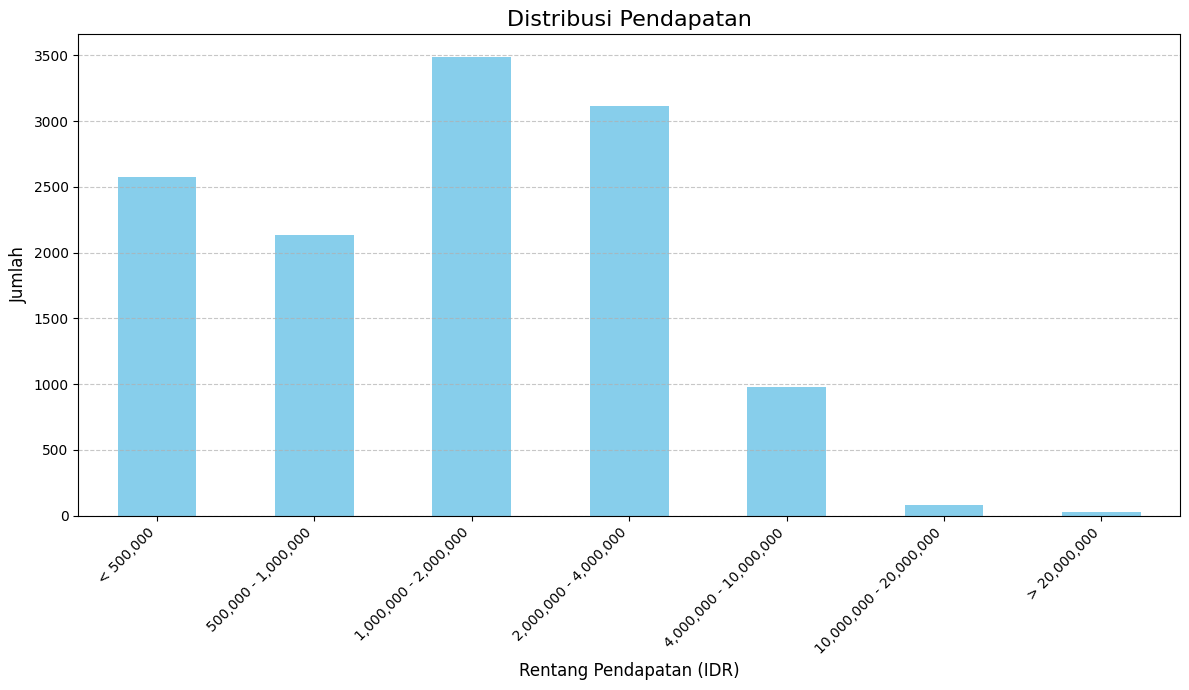

In [41]:
# Create a bar chart
plt.figure(figsize=(12, 7))
income_counts.plot(kind='bar', color='skyblue')

# Set labels and title
plt.title('Distribusi Pendapatan', fontsize=16)
plt.xlabel('Rentang Pendapatan (IDR)', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add a grid for easier reading
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to make sure labels are not cut off
plt.tight_layout()

# Save the plot
plt.savefig('income_distribution_bar_chart.png')

### Process

In [57]:
b3a_kw1 = pd.read_stata('adult_a/b3a_kw1.dta')
b3a_kw1

,hhid14_9,pid14,kw300a,kw00ba,kw00bc,kw00c,kw00d,kw01a,kw301,kw02a1,...,kw27a,kw27b,hhid14,pidlink,kw02m,kw12b,kw13b,kw14,version,module
0,001060000,1.0,3:No,NaN,NaN,NaN,NaN,5:Married formal according to adat law,3:No,1:Yes,...,NaN,NaN,0010600,001060001,NaN,NaN,2000000.0,200000.0,1.3,B3A_KW1
1,001060004,1.0,3:No,NaN,NaN,NaN,NaN,5:Married formal according to adat law,1:Yes,NaN,...,NaN,NaN,0010651,001060004,NaN,NaN,NaN,NaN,1.3,B3A_KW1
2,001060000,7.0,3:No,NaN,NaN,NaN,NaN,3:Married formal (KUA or civil registration),1:Yes,NaN,...,NaN,NaN,0010600,001060007,NaN,NaN,NaN,NaN,1.3,B3A_KW1
3,001060000,8.0,3:No,NaN,NaN,NaN,NaN,1:Never married,NaN,NaN,...,NaN,NaN,0010600,001060008,NaN,NaN,NaN,NaN,1.3,B3A_KW1
4,001060004,2.0,3:No,NaN,NaN,NaN,NaN,3:Married formal (KUA or civil registration),3:No,1:Yes,...,NaN,NaN,0010651,001065102,NaN,NaN,NaN,NaN,1.3,B3A_KW1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34459,321291100,3.0,3:No,NaN,NaN,NaN,NaN,1:Never married,NaN,NaN,...,NaN,NaN,3212911,321291103,NaN,NaN,NaN,NaN,1.3,B3A_KW1
34460,321291100,4.0,3:No,NaN,NaN,NaN,NaN,1:Never married,NaN,NaN,...,NaN,NaN,3212911,321291104,NaN,NaN,NaN,NaN,1.3,B3A_KW1
34461,321300000,1.0,1:Yes,3.0,2.0,1:Yes,3:No,NaN,NaN,1:Yes,...,NaN,NaN,3213000,321300001,NaN,NaN,NaN,NaN,1.3,B3A_KW1
34462,321300000,2.0,1:Yes,3.0,1.0,1:Yes,3:No,NaN,NaN,1:Yes,...,NaN,NaN,3213000,321300002,NaN,NaN,NaN,NaN,1.3,B3A_KW1


In [29]:
b3a_kw1['kw04'].value_counts()

kw04
3:Self                               4130
1:Parents                             203
4:Other family member from parent      61
5:Others                               35
9:MISSING                               2
Name: count, dtype: int64

In [63]:
b3a_kw1_clean = b3a_kw1[['pidlink', 'kw03', 'kw04']]
b3a_kw1_clean

,pidlink,kw03,kw04
0,001060001,2.0,3:Self
1,001060004,NaN,NaN
2,001060007,NaN,NaN
3,001060008,NaN,NaN
4,001065102,1.0,1:Parents
...,...,...,...
34459,321291103,NaN,NaN
34460,321291104,NaN,NaN
34461,321300001,NaN,NaN
34462,321300002,NaN,NaN


In [64]:
b3a_kw1_clean = b3a_kw1_clean.dropna()
b3a_kw1_clean

,pidlink,kw03,kw04
0,001060001,2.0,3:Self
4,001065102,1.0,1:Parents
5,001080003,1.0,3:Self
16,001240002,1.0,1:Parents
17,001240003,1.0,1:Parents
...,...,...,...
34439,321270004,1.0,3:Self
34441,321270006,1.0,3:Self
34447,321280005,1.0,3:Self
34448,321280008,1.0,3:Self


In [65]:
b3a_kw1_clean['kw04'].value_counts()

kw04
3:Self                               4130
1:Parents                             203
4:Other family member from parent      61
5:Others                               35
9:MISSING                               2
Name: count, dtype: int64

In [67]:
values_drop = ['9:MISSING']
b3a_kw1_clean = b3a_kw1_clean[~b3a_kw1_clean['kw04'].isin(values_drop)]
b3a_kw1_clean

,pidlink,kw03,kw04
0,001060001,2.0,3:Self
4,001065102,1.0,1:Parents
5,001080003,1.0,3:Self
16,001240002,1.0,1:Parents
17,001240003,1.0,1:Parents
...,...,...,...
34439,321270004,1.0,3:Self
34441,321270006,1.0,3:Self
34447,321280005,1.0,3:Self
34448,321280008,1.0,3:Self


In [68]:
b3a_kw1_clean['kw03'].value_counts()

kw03
1.0              3763
2.0               521
3.0                96
4.0                24
5.0                10
6.0                 7
8.0                 4
9.0                 2
11.0                2
10.0                0
98:Don't Know       0
99:MISSING          0
Name: count, dtype: int64

In [69]:
b3a_kw1_clean

,pidlink,kw03,kw04
0,001060001,2.0,3:Self
4,001065102,1.0,1:Parents
5,001080003,1.0,3:Self
16,001240002,1.0,1:Parents
17,001240003,1.0,1:Parents
...,...,...,...
34439,321270004,1.0,3:Self
34441,321270006,1.0,3:Self
34447,321280005,1.0,3:Self
34448,321280008,1.0,3:Self


In [70]:
b3a_kw1_clean.to_csv('clean_data/b3a_kw1_clean.csv', index=False)

### Process b4

In [11]:
b4_kw2 = pd.read_stata('female/b4_kw2.dta')
b4_kw2

,hhid14_9,pid14,kw00a,kw00ba,kw00bc,kw00c,kw00d,kw03a,kw03,kw02a1,...,kw24a,kw24b,kw25,kw26x,kw26,kw27x,kw27a,kw27b,version,module
0,001060004,1.0,3:No => KW03a,NaN,NaN,NaN,NaN,5:Married formal according to adat law,1.0,1:Yes,...,1:Yes,NaN,1:Yes,95:Up to God,NaN,95:Up to God,NaN,NaN,1.3,B4_KW2
1,001060000,7.0,3:No => KW03a,NaN,NaN,NaN,NaN,3:Married formal (KUA or civil registration),1.0,1:Yes,...,1:Yes,NaN,1:Yes,95:Up to God,NaN,95:Up to God,NaN,NaN,1.3,B4_KW2
2,001080003,2.0,3:No => KW03a,NaN,NaN,NaN,NaN,4:Married formal according to religious law,1.0,3:No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3,B4_KW2
3,001220000,2.0,1:Yes,4.0,1.0,1:Yes,3:No => KW02A1,NaN,NaN,1:Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3,B4_KW2
4,001224100,2.0,3:No => KW03a,NaN,NaN,NaN,NaN,3:Married formal (KUA or civil registration),1.0,1:Yes,...,1:Yes,NaN,3:No,NaN,NaN,NaN,NaN,NaN,1.3,B4_KW2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12183,321270004,2.0,3:No => KW03a,NaN,NaN,NaN,NaN,3:Married formal (KUA or civil registration),1.0,1:Yes,...,1:Yes,NaN,1:Yes,1:Given,1.0,1:Given,0.0,1.0,1.3,B4_KW2
12184,321280006,2.0,1:Yes,7.0,96.0,1:Yes,1:Yes,3:Married formal (KUA or civil registration),2.0,1:Yes,...,3:No,1:Yes,1:Yes,1:Given,1.0,1:Given,1.0,0.0,1.3,B4_KW2
12185,321280000,12.0,3:No => KW03a,NaN,NaN,NaN,NaN,3:Married formal (KUA or civil registration),1.0,1:Yes,...,1:Yes,NaN,1:Yes,1:Given,2.0,1:Given,1.0,1.0,1.3,B4_KW2
12186,321291100,2.0,1:Yes,3.0,1.0,1:Yes,3:No => KW02A1,NaN,NaN,1:Yes,...,3:No,3:No,3:No,NaN,NaN,NaN,NaN,NaN,1.3,B4_KW2


In [12]:
b4_kw2_clean = b4_kw2[['pidlink', 'kw03', 'kw04']]
b4_kw2_clean

,pidlink,kw03,kw04
0,001060004,1.0,1:Parent
1,001060007,1.0,3:Self
2,001080012,1.0,3:Self
3,001220002,NaN,NaN
4,001220011,1.0,1:Parent
...,...,...,...
12183,321275102,1.0,1:Parent
12184,321280006,2.0,3:Self
12185,321280012,1.0,3:Self
12186,321290002,NaN,NaN


In [13]:
b4_kw2_clean['kw04'].value_counts()

kw04
3:Self      4114
1:Parent     273
4:Family      84
95:Other      32
Name: count, dtype: int64

In [14]:
b4_kw2_clean.to_csv('clean_data/b4_kw2_clean.csv', index=False)

### Process all

In [15]:
cov = pd.read_csv('clean_data/b3a_cov_clean.csv')
cov

,pidlink,marstat,age,sex
0,1060001,2:Married,59,1:Male
1,1060004,2:Married,28,3:Female
2,1060007,2:Married,39,3:Female
3,1065102,2:Married,30,1:Male
4,1080003,2:Married,36,1:Male
...,...,...,...,...
29154,321290003,2:Married,44,3:Female
29155,321290004,2:Married,45,1:Male
29156,321290005,2:Married,39,1:Male
29157,321300001,2:Married,48,1:Male


In [16]:
dl1 = pd.read_csv('clean_data/b3a_dl1_clean.csv')
dl1

,pidlink,dl01f,dl06
0,1060001,M,6.0
1,1060004,M,6.0
2,1060007,M,6.0
3,1060008,M,9.0
4,1065102,M,9.0
...,...,...,...
32552,321291103,L,15.0
32553,321291104,L,16.0
32554,321300001,L,13.0
32555,321300002,E,12.0


In [17]:
kw1 = pd.read_csv('clean_data/b3a_kw1_clean.csv')
kw1

,pidlink,kw03,kw04
0,1060001,2.0,3:Self
1,1065102,1.0,1:Parents
2,1080003,1.0,3:Self
3,1240002,1.0,1:Parents
4,1240003,1.0,1:Parents
...,...,...,...
4424,321270004,1.0,3:Self
4425,321270006,1.0,3:Self
4426,321280005,1.0,3:Self
4427,321280008,1.0,3:Self


In [18]:
tk2 = pd.read_csv('clean_data/b3a_tk2_clean.csv')
tk2

,pidlink,tk25a1,tk25a2
0,1220003,0.0,3500000.0
1,1220006,2000000.0,8000000.0
2,1220008,700000.0,2050000.0
3,1240007,200000.0,3600000.0
4,1240016,240000.0,240000.0
...,...,...,...
12393,321280005,2000000.0,26000000.0
12394,321280008,30000000.0,33000000.0
12395,321280009,5000000.0,62500000.0
12396,321280012,400000.0,4800000.0


In [19]:
kw2 = pd.read_csv('clean_data/b4_kw2_clean.csv')
kw2

,pidlink,kw03,kw04
0,1060004,1.0,1:Parent
1,1060007,1.0,3:Self
2,1080012,1.0,3:Self
3,1220002,NaN,NaN
4,1220011,1.0,1:Parent
...,...,...,...
12183,321275102,1.0,1:Parent
12184,321280006,2.0,3:Self
12185,321280012,1.0,3:Self
12186,321290002,NaN,NaN


In [23]:
df_merged = pd.merge(cov, kw1, how='left', on='pidlink')
df_merged = pd.merge(df_merged, kw2, how='left', on='pidlink')
df_merged

,pidlink,marstat,age,sex,kw03_x,kw04_x,kw03_y,kw04_y
0,1060001,2:Married,59,1:Male,2.0,3:Self,NaN,NaN
1,1060004,2:Married,28,3:Female,NaN,NaN,1.0,1:Parent
2,1060007,2:Married,39,3:Female,NaN,NaN,1.0,3:Self
3,1065102,2:Married,30,1:Male,1.0,1:Parents,NaN,NaN
4,1080003,2:Married,36,1:Male,1.0,3:Self,NaN,NaN
...,...,...,...,...,...,...,...,...
29154,321290003,2:Married,44,3:Female,NaN,NaN,NaN,NaN
29155,321290004,2:Married,45,1:Male,NaN,NaN,NaN,NaN
29156,321290005,2:Married,39,1:Male,NaN,NaN,NaN,NaN
29157,321300001,2:Married,48,1:Male,NaN,NaN,NaN,NaN


In [25]:
# Create a new 'kw03' column by combining 'kw03_x' and 'kw03_y'
df_merged['kw03'] = df_merged['kw03_x'].fillna(df_merged['kw03_y'])

# Create a new 'kw04' column by combining 'kw04_x' and 'kw04_y'
df_merged['kw04'] = df_merged['kw04_x'].fillna(df_merged['kw04_y'])

# Drop the original columns
df_merged = df_merged.drop(columns=['kw03_x', 'kw04_x', 'kw03_y', 'kw04_y'])
df_merged

,pidlink,marstat,age,sex,kw03,kw04
0,1060001,2:Married,59,1:Male,2.0,3:Self
1,1060004,2:Married,28,3:Female,1.0,1:Parent
2,1060007,2:Married,39,3:Female,1.0,3:Self
3,1065102,2:Married,30,1:Male,1.0,1:Parents
4,1080003,2:Married,36,1:Male,1.0,3:Self
...,...,...,...,...,...,...
29154,321290003,2:Married,44,3:Female,NaN,NaN
29155,321290004,2:Married,45,1:Male,NaN,NaN
29156,321290005,2:Married,39,1:Male,NaN,NaN
29157,321300001,2:Married,48,1:Male,NaN,NaN


In [26]:
df_merged = df_merged.dropna()
df_merged

,pidlink,marstat,age,sex,kw03,kw04
0,1060001,2:Married,59,1:Male,2.0,3:Self
1,1060004,2:Married,28,3:Female,1.0,1:Parent
2,1060007,2:Married,39,3:Female,1.0,3:Self
3,1065102,2:Married,30,1:Male,1.0,1:Parents
4,1080003,2:Married,36,1:Male,1.0,3:Self
...,...,...,...,...,...,...
29145,321280005,2:Married,42,1:Male,1.0,3:Self
29146,321280006,2:Married,40,3:Female,2.0,3:Self
29147,321280008,2:Married,33,1:Male,1.0,3:Self
29148,321280009,2:Married,32,1:Male,1.0,3:Self


In [38]:
df_merged['sex'].value_counts()

sex
1:Male      2527
3:Female    1334
Name: count, dtype: int64

In [29]:
df_merged = pd.merge(df_merged, dl1, how='inner', on='pidlink')
df_merged = pd.merge(df_merged, tk2, how='inner', on='pidlink')
df_merged

,pidlink,marstat,age,sex,kw03,kw04,dl01f,dl06,tk25a1,tk25a2
0,1245201,2:Married,30,1:Male,1.0,4:Other family member from parent,M,9.0,800000.0,1200000.0
1,1290004,2:Married,29,1:Male,1.0,3:Self,M,6.0,400000.0,3000000.0
2,2010006,2:Married,24,3:Female,1.0,1:Parent,M,6.0,1500000.0,4700000.0
3,2020011,2:Married,22,3:Female,1.0,1:Parent,M,9.0,140000.0,600000.0
4,2050003,2:Married,28,1:Male,1.0,1:Parents,M,6.0,1600000.0,19200000.0
...,...,...,...,...,...,...,...,...,...,...
3856,321270006,2:Married,29,1:Male,1.0,3:Self,E L,12.0,2800000.0,359520000.0
3857,321280005,2:Married,42,1:Male,1.0,3:Self,E,13.0,2000000.0,26000000.0
3858,321280008,2:Married,33,1:Male,1.0,3:Self,H,16.0,30000000.0,33000000.0
3859,321280009,2:Married,32,1:Male,1.0,3:Self,L,12.0,5000000.0,62500000.0


In [30]:
df_merged['sex'].value_counts()

sex
1:Male      2527
3:Female    1334
Name: count, dtype: int64

In [39]:
df_merged['marstat'].value_counts()

marstat
2:Married      3672
4:Divorced      124
5:Widowed        35
3:Separated      30
Name: count, dtype: int64

In [40]:
df_merged['dl01f'].value_counts()

dl01f
A        1693
B         498
H         219
I         209
C         199
Q         147
D         146
E         104
J         101
C1         99
G          88
L          75
K          72
S          32
V          27
O          22
F          20
N          17
P          16
M          14
T          12
D1         11
E L         5
A G         5
B1          3
A Q         2
A D         2
E1          2
U           2
A B         2
A S         1
A B H       1
A L         1
A C1        1
R           1
H I         1
D V         1
H S         1
G S         1
B J         1
A E         1
A U         1
A F         1
F1          1
A1          1
A D1        1
Name: count, dtype: int64

In [41]:
df_merged['kw03'].value_counts()

kw03
1.000    3421
2.000     373
3.000      54
4.000       7
5.000       3
9.000       2
6.000       1
Name: count, dtype: int64

In [34]:
df_merged['kw04'].value_counts()

kw04
3:Self                               3661
1:Parents                              70
1:Parent                               65
4:Other family member from parent      20
5:Others                               20
4:Family                               19
95:Other                                6
Name: count, dtype: int64

In [37]:
df_merged['tk25a1'].describe()

count       3861.000
mean     1859012.691
std      2630904.622
min            0.000
25%       696000.000
50%      1500000.000
75%      2500000.000
max     90000000.000
Name: tk25a1, dtype: float64

In [43]:
values_drop = ['5:Others', '95:Other']
df_merged = df_merged[~df_merged['kw04'].isin(values_drop)]
df_merged['kw04'].value_counts()

kw04
3:Self                               3661
1:Parents                              70
1:Parent                               65
4:Other family member from parent      20
4:Family                               19
Name: count, dtype: int64

In [44]:
df_merged

,pidlink,marstat,age,sex,kw03,kw04,dl01f,dl06,tk25a1,tk25a2
0,1245201,2:Married,30,1:Male,1.000,4:Other family member from parent,M,9.000,800000.000,1200000.000
1,1290004,2:Married,29,1:Male,1.000,3:Self,M,6.000,400000.000,3000000.000
2,2010006,2:Married,24,3:Female,1.000,1:Parent,M,6.000,1500000.000,4700000.000
3,2020011,2:Married,22,3:Female,1.000,1:Parent,M,9.000,140000.000,600000.000
4,2050003,2:Married,28,1:Male,1.000,1:Parents,M,6.000,1600000.000,19200000.000
...,...,...,...,...,...,...,...,...,...,...
3856,321270006,2:Married,29,1:Male,1.000,3:Self,E L,12.000,2800000.000,359520000.000
3857,321280005,2:Married,42,1:Male,1.000,3:Self,E,13.000,2000000.000,26000000.000
3858,321280008,2:Married,33,1:Male,1.000,3:Self,H,16.000,30000000.000,33000000.000
3859,321280009,2:Married,32,1:Male,1.000,3:Self,L,12.000,5000000.000,62500000.000


In [45]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3835 entries, 0 to 3860
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   pidlink  3835 non-null   int64  
 1   marstat  3835 non-null   object 
 2   age      3835 non-null   int64  
 3   sex      3835 non-null   object 
 4   kw03     3835 non-null   float64
 5   kw04     3835 non-null   object 
 6   dl01f    3834 non-null   object 
 7   dl06     3835 non-null   float64
 8   tk25a1   3835 non-null   float64
 9   tk25a2   3835 non-null   float64
dtypes: float64(4), int64(2), object(4)
memory usage: 329.6+ KB


In [55]:
df_merged = df_merged.rename(columns={'tk25a1': 'income/month', 'kw04': 'who_chose_your_partner', 'kw03': 'times_married', 'dl01f': 'ethnicity', 'dl06': 'education', 'tk25a2': 'income/year'})
df_merged

,pidlink,marstat,age,sex,times_married,who_chose_your_partner,ethnicity,education,income/month,income/year
0,1245201,2:Married,30,1:Male,1.000,4:Other family member from parent,[Nias],9.000,800000.000,1200000.000
1,1290004,2:Married,29,1:Male,1.000,3:Self,[Nias],6.000,400000.000,3000000.000
2,2010006,2:Married,24,3:Female,1.000,1:Parent,[Nias],6.000,1500000.000,4700000.000
3,2020011,2:Married,22,3:Female,1.000,1:Parent,[Nias],9.000,140000.000,600000.000
4,2050003,2:Married,28,1:Male,1.000,1:Parents,[Nias],6.000,1600000.000,19200000.000
...,...,...,...,...,...,...,...,...,...,...
3856,321270006,2:Married,29,1:Male,1.000,3:Self,"[Bugis, Makassar]",12.000,2800000.000,359520000.000
3857,321280005,2:Married,42,1:Male,1.000,3:Self,[Bugis],13.000,2000000.000,26000000.000
3858,321280008,2:Married,33,1:Male,1.000,3:Self,[Sasak],16.000,30000000.000,33000000.000
3859,321280009,2:Married,32,1:Male,1.000,3:Self,[Makassar],12.000,5000000.000,62500000.000


In [48]:
df_merged = df_merged.rename(columns={'race': 'ethnicity'})
df_merged

,pidlink,marstat,age,sex,times_married,who_chose_your_partner,ethnicity,dl06,income/month,income/year
0,1245201,2:Married,30,1:Male,1.000,4:Other family member from parent,M,9.000,800000.000,1200000.000
1,1290004,2:Married,29,1:Male,1.000,3:Self,M,6.000,400000.000,3000000.000
2,2010006,2:Married,24,3:Female,1.000,1:Parent,M,6.000,1500000.000,4700000.000
3,2020011,2:Married,22,3:Female,1.000,1:Parent,M,9.000,140000.000,600000.000
4,2050003,2:Married,28,1:Male,1.000,1:Parents,M,6.000,1600000.000,19200000.000
...,...,...,...,...,...,...,...,...,...,...
3856,321270006,2:Married,29,1:Male,1.000,3:Self,E L,12.000,2800000.000,359520000.000
3857,321280005,2:Married,42,1:Male,1.000,3:Self,E,13.000,2000000.000,26000000.000
3858,321280008,2:Married,33,1:Male,1.000,3:Self,H,16.000,30000000.000,33000000.000
3859,321280009,2:Married,32,1:Male,1.000,3:Self,L,12.000,5000000.000,62500000.000


In [50]:
ethnic_mapping = {
    'A': 'Jawa',
    'B': 'Sunda',
    'C': 'Bali',
    'D': 'Batak',
    'E': 'Bugis',
    'F': 'Tionghoa',
    'G': 'Madura',
    'H': 'Sasak',
    'I': 'Minang',
    'J': 'Banjar',
    'K': 'Bima-Dompu',
    'L': 'Makassar',
    'M': 'Nias',
    'N': 'Palembang',
    'O': 'Sumbawa',
    'P': 'Toraja',
    'Q': 'Betawi',
    'R': 'Dayak',
    'S': 'Melayu',
    'T': 'Komering',
    'U': 'Ambon',
    'A1': 'Manado',
    'B1': 'Aceh',
    'C1': 'Other South Sumatera',
    'D1': 'Banten',
    'E1': 'Cirebon',
    'F1': 'Gorontalo',
    'G1': 'Kutai',
    'V': 'Other',
}

# 3. Fungsi untuk memetakan setiap kode (termasuk yang memiliki spasi)
def map_ethnic_codes(code_string):
    if isinstance(code_string, str):
        # Pisahkan kode jika ada spasi, lalu petakan satu per satu
        codes = code_string.split()
        return [ethnic_mapping.get(code, 'Unknown') for code in codes]
    return np.nan # Mengembalikan NaN jika nilai bukan string

# 4. Terapkan fungsi ke kolom 'ethnic_code' untuk membuat kolom baru
df_merged['ethnicity'] = df_merged['ethnicity'].apply(map_ethnic_codes)

df_merged


,pidlink,marstat,age,sex,times_married,who_chose_your_partner,ethnicity,dl06,income/month,income/year
0,1245201,2:Married,30,1:Male,1.000,4:Other family member from parent,[Nias],9.000,800000.000,1200000.000
1,1290004,2:Married,29,1:Male,1.000,3:Self,[Nias],6.000,400000.000,3000000.000
2,2010006,2:Married,24,3:Female,1.000,1:Parent,[Nias],6.000,1500000.000,4700000.000
3,2020011,2:Married,22,3:Female,1.000,1:Parent,[Nias],9.000,140000.000,600000.000
4,2050003,2:Married,28,1:Male,1.000,1:Parents,[Nias],6.000,1600000.000,19200000.000
...,...,...,...,...,...,...,...,...,...,...
3856,321270006,2:Married,29,1:Male,1.000,3:Self,"[Bugis, Makassar]",12.000,2800000.000,359520000.000
3857,321280005,2:Married,42,1:Male,1.000,3:Self,[Bugis],13.000,2000000.000,26000000.000
3858,321280008,2:Married,33,1:Male,1.000,3:Self,[Sasak],16.000,30000000.000,33000000.000
3859,321280009,2:Married,32,1:Male,1.000,3:Self,[Makassar],12.000,5000000.000,62500000.000


In [58]:
df_merged['age'].describe()

count   3835.000
mean      31.783
std        8.192
min       16.000
25%       26.000
50%       30.000
75%       35.000
max       76.000
Name: age, dtype: float64

In [56]:
df_merged.to_csv('clean_data/data_clean.csv', index=False)

### Statistical Description

In [8]:
df_clean.to_csv('clean_data/data_clean.csv', index=False)

In [3]:
sns.set_style('whitegrid')

In [9]:
df_clean = pd.read_csv('clean_data/data_clean.csv')
df_clean

,pidlink,marstat,age,sex,times_married,who_chose_your_partner,ethnicity,education,income/month,income/year
0,1245201,Married,30,Male,1.0,Other family member,['Nias'],9.0,800000.0,1200000.0
1,1290004,Married,29,Male,1.0,Self,['Nias'],6.0,400000.0,3000000.0
2,2010006,Married,24,Female,1.0,Parents,['Nias'],6.0,1500000.0,4700000.0
3,2020011,Married,22,Female,1.0,Parents,['Nias'],9.0,140000.0,600000.0
4,2050003,Married,28,Male,1.0,Parents,['Nias'],6.0,1600000.0,19200000.0
...,...,...,...,...,...,...,...,...,...,...
3830,321270006,Married,29,Male,1.0,Self,"['Bugis', 'Makassar']",12.0,2800000.0,359520000.0
3831,321280005,Married,42,Male,1.0,Self,['Bugis'],13.0,2000000.0,26000000.0
3832,321280008,Married,33,Male,1.0,Self,['Sasak'],16.0,30000000.0,33000000.0
3833,321280009,Married,32,Male,1.0,Self,['Makassar'],12.0,5000000.0,62500000.0


In [ ]:
# 

In [59]:
df_clean['marstat'].value_counts()

marstat
2:Married      3651
4:Divorced      120
5:Widowed        34
3:Separated      30
Name: count, dtype: int64

In [6]:
conditions = [
        (df_clean['marstat'] == 'Married') & (df_clean['times_married'] > 1),
        (df_clean['marstat'] == 'Married') & (df_clean['times_married'] == 1)
]
choices = ['Remarried', 'Married']
    
df_clean['marstat'] = np.select(conditions, choices, default=df_clean['marstat'])
df_clean

,pidlink,marstat,age,sex,times_married,who_chose_your_partner,ethnicity,education,income/month,income/year
0,1245201,Married,30,Male,1.0,Other family member,['Nias'],9.0,800000.0,1200000.0
1,1290004,Married,29,Male,1.0,Self,['Nias'],6.0,400000.0,3000000.0
2,2010006,Married,24,Female,1.0,Parents,['Nias'],6.0,1500000.0,4700000.0
3,2020011,Married,22,Female,1.0,Parents,['Nias'],9.0,140000.0,600000.0
4,2050003,Married,28,Male,1.0,Parents,['Nias'],6.0,1600000.0,19200000.0
...,...,...,...,...,...,...,...,...,...,...
3830,321270006,Married,29,Male,1.0,Self,"['Bugis', 'Makassar']",12.0,2800000.0,359520000.0
3831,321280005,Married,42,Male,1.0,Self,['Bugis'],13.0,2000000.0,26000000.0
3832,321280008,Married,33,Male,1.0,Self,['Sasak'],16.0,30000000.0,33000000.0
3833,321280009,Married,32,Male,1.0,Self,['Makassar'],12.0,5000000.0,62500000.0


In [7]:
df_clean['marstat'].value_counts()

marstat
Married      3252
Remarried     399
Divorced      120
Widowed        34
Separated      30
Name: count, dtype: int64

In [5]:
# change the value for marstat, sex, and who_chose_your_partner columns value to clean value without number and ":"
df_clean['marstat'] = df_clean['marstat'].str.replace('2:Married', 'Married')
df_clean['marstat'] = df_clean['marstat'].str.replace('4:Divorced', 'Divorced')
df_clean['marstat'] = df_clean['marstat'].str.replace('5:Widowed', 'Widowed')
df_clean['marstat'] = df_clean['marstat'].str.replace('3:Separated', 'Separated')
df_clean['sex'] = df_clean['sex'].str.replace('1:Male', 'Male')
df_clean['sex'] = df_clean['sex'].str.replace('3:Female', 'Female')
df_clean['who_chose_your_partner'] = df_clean['who_chose_your_partner'].str.replace('3:Self', 'Self')
df_clean['who_chose_your_partner'] = df_clean['who_chose_your_partner'].str.replace('1:Parents', 'Parents')
df_clean['who_chose_your_partner'] = df_clean['who_chose_your_partner'].str.replace('1:Parent', 'Parents')
df_clean['who_chose_your_partner'] = df_clean['who_chose_your_partner'].str.replace('4:Other family member from parent', 'Other family member')
df_clean['who_chose_your_partner'] = df_clean['who_chose_your_partner'].str.replace('4:Family', 'Other family member')
df_clean

,pidlink,marstat,age,sex,times_married,who_chose_your_partner,ethnicity,education,income/month,income/year
0,1245201,Married,30,Male,1.0,Other family member,['Nias'],9.0,800000.0,1200000.0
1,1290004,Married,29,Male,1.0,Self,['Nias'],6.0,400000.0,3000000.0
2,2010006,Married,24,Female,1.0,Parents,['Nias'],6.0,1500000.0,4700000.0
3,2020011,Married,22,Female,1.0,Parents,['Nias'],9.0,140000.0,600000.0
4,2050003,Married,28,Male,1.0,Parents,['Nias'],6.0,1600000.0,19200000.0
...,...,...,...,...,...,...,...,...,...,...
3830,321270006,Married,29,Male,1.0,Self,"['Bugis', 'Makassar']",12.0,2800000.0,359520000.0
3831,321280005,Married,42,Male,1.0,Self,['Bugis'],13.0,2000000.0,26000000.0
3832,321280008,Married,33,Male,1.0,Self,['Sasak'],16.0,30000000.0,33000000.0
3833,321280009,Married,32,Male,1.0,Self,['Makassar'],12.0,5000000.0,62500000.0


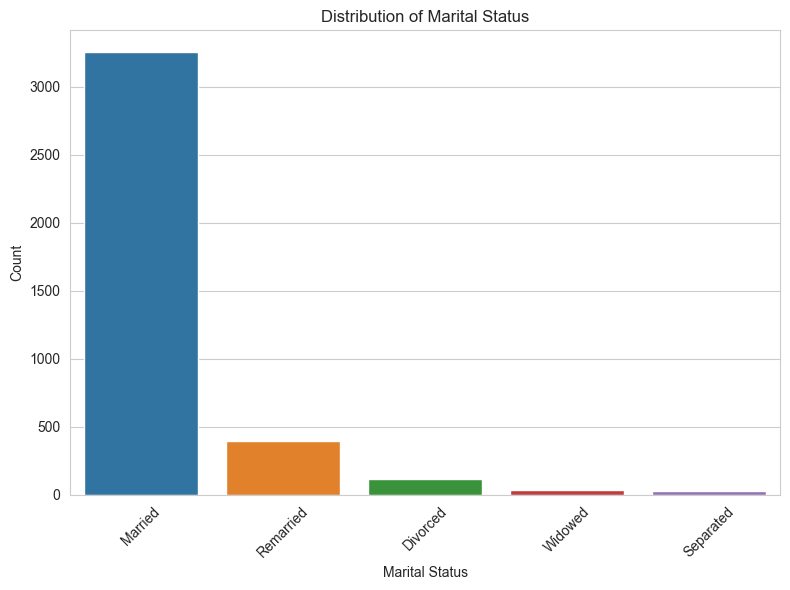

In [16]:
# 1. Marital Status (marstat) - Bar Chart
plt.figure(figsize=(8, 6))
sns.countplot(x='marstat', data=df_clean, order=df_clean['marstat'].value_counts().index)
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('marital_status_distribution.png')
plt.show()

In [60]:
df_clean['age'].describe()

count   3835.000
mean      31.783
std        8.192
min       16.000
25%       26.000
50%       30.000
75%       35.000
max       76.000
Name: age, dtype: float64

c:\Programming\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


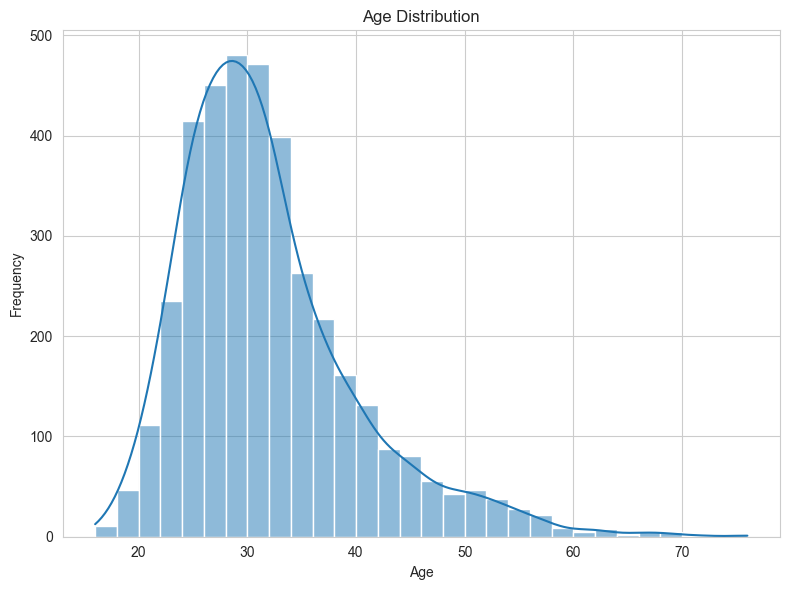

In [73]:
# 2. Age - Histogram
plt.figure(figsize=(8, 6))
sns.histplot(df_clean['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('age_distribution.png')
plt.show()

In [17]:
df_clean['sex'].value_counts()

sex
Male      2510
Female    1325
Name: count, dtype: int64

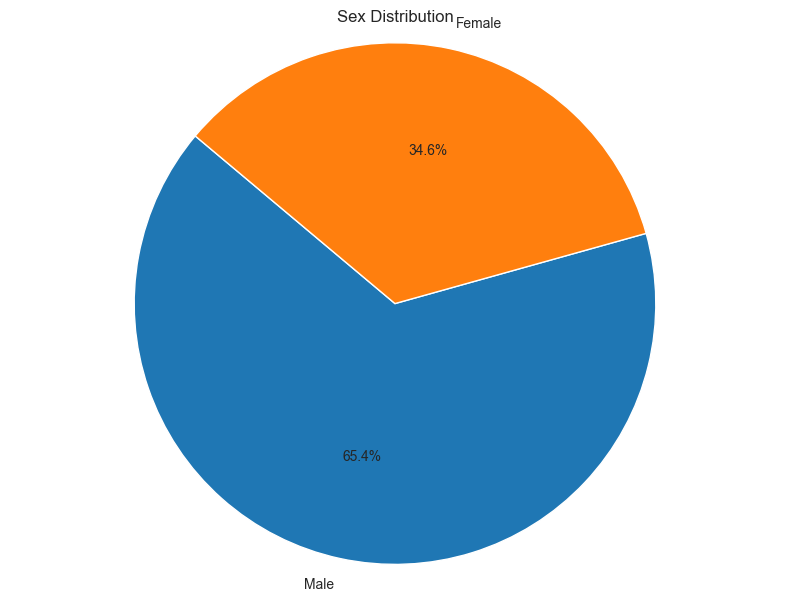

In [18]:
# 3. Sex - Pie Chart
plt.figure(figsize=(8, 6))
sex_counts = df_clean['sex'].value_counts()
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sex Distribution')
plt.axis('equal')
plt.tight_layout()
plt.savefig('sex_distribution.png')
plt.show()

In [62]:
df_clean['times_married'].value_counts()

times_married
1.000    3398
2.000     370
3.000      54
4.000       7
5.000       3
9.000       2
6.000       1
Name: count, dtype: int64

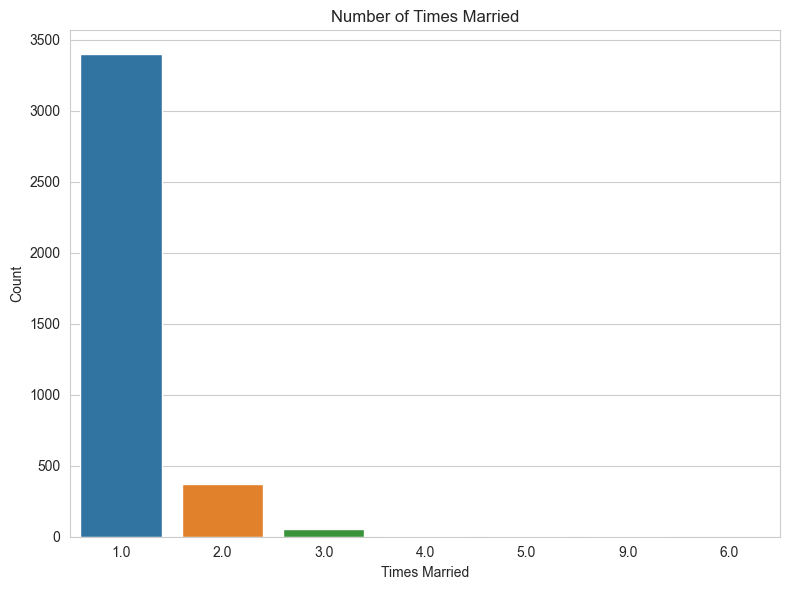

In [76]:
# 4. Times Married - Bar Chart
plt.figure(figsize=(8, 6))
sns.countplot(x='times_married', data=df_clean, order=df_clean['times_married'].value_counts().index)
plt.title('Number of Times Married')
plt.xlabel('Times Married')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('times_married_distribution.png')
plt.show()

In [20]:
df_clean['who_chose_your_partner'].value_counts()

who_chose_your_partner
Self                   3661
Parents                 135
Other family member      39
Name: count, dtype: int64

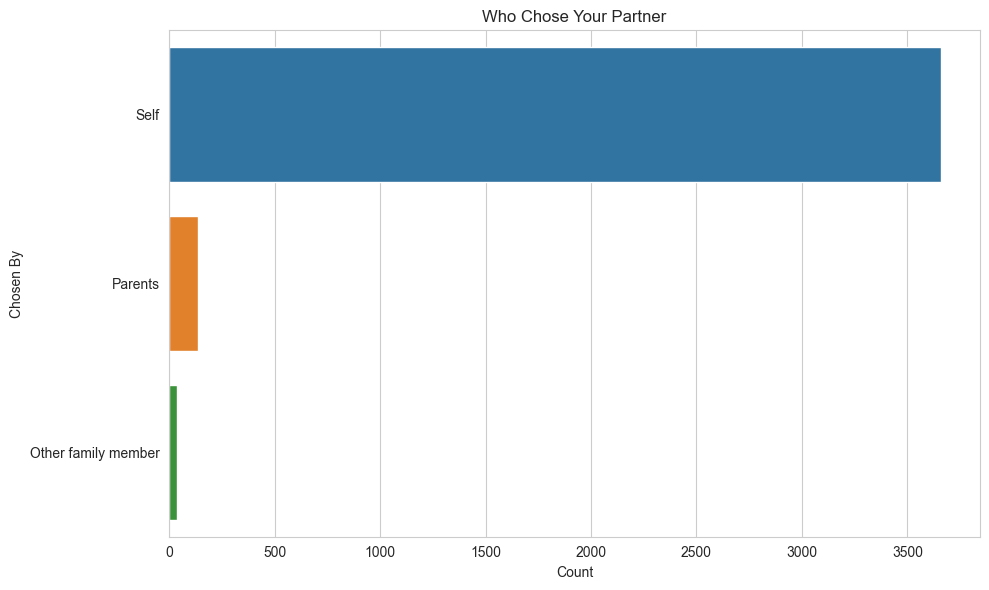

In [19]:
# 5. Who Chose Your Partner - Bar Chart
plt.figure(figsize=(10, 6))
sns.countplot(y='who_chose_your_partner', data=df_clean, order=df_clean['who_chose_your_partner'].value_counts().index)
plt.title('Who Chose Your Partner')
plt.xlabel('Count')
plt.ylabel('Chosen By')
plt.tight_layout()
plt.savefig('partner_choice_distribution.png')
plt.show()

In [64]:
df_clean['ethnicity'].value_counts()

ethnicity
['Jawa']                            1680
['Sunda']                            496
['Sasak']                            218
['Minang']                           207
['Bali']                             198
['Batak']                            146
['Betawi']                           144
['Bugis']                            104
['Banjar']                           100
['Other South Sumatera']              99
['Madura']                            86
['Makassar']                          75
['Bima-Dompu']                        72
['Melayu']                            32
['Other']                             27
['Sumbawa']                           22
['Tionghoa']                          19
['Palembang']                         17
['Toraja']                            16
['Nias']                              14
['Komering']                          12
['Banten']                            11
['Bugis', 'Makassar']                  5
['Jawa', 'Madura']                     5
['Aceh

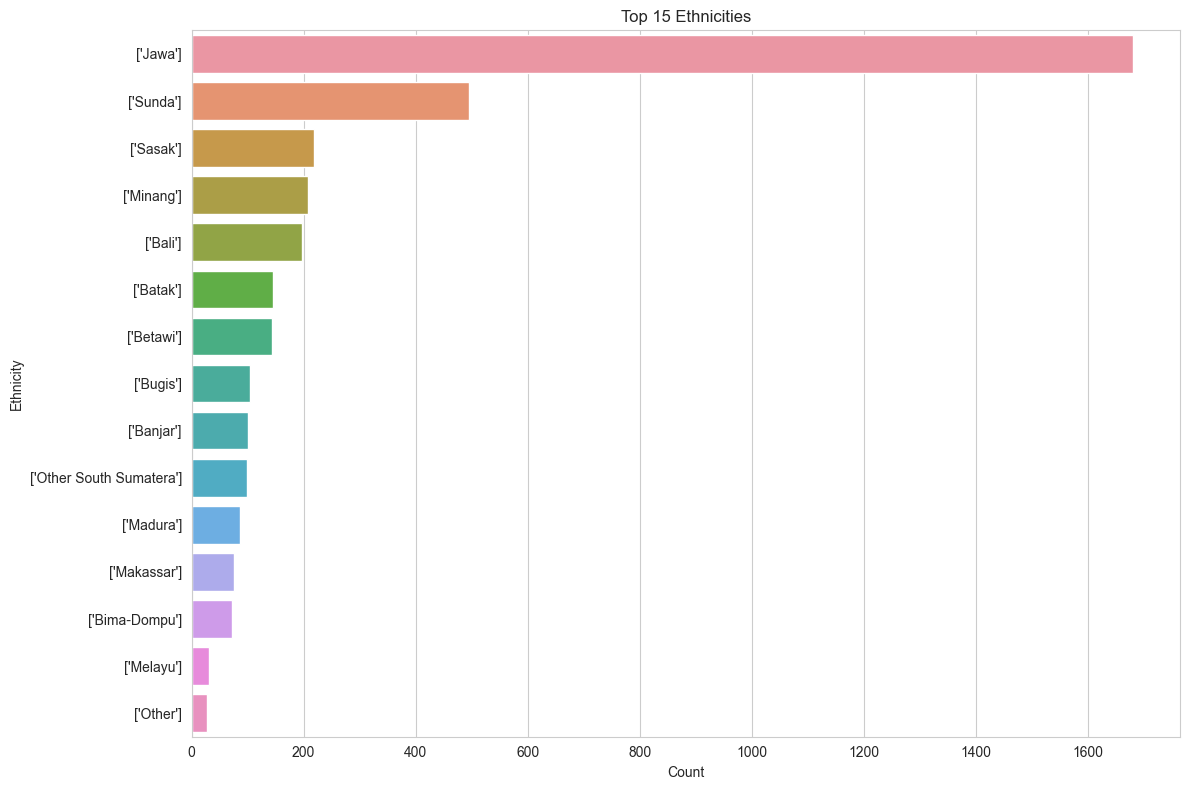

In [78]:
# 6. Ethnicity - Horizontal Bar Chart (Top 15)
plt.figure(figsize=(12, 8))
top_15_ethnicity = df_clean['ethnicity'].value_counts().nlargest(15)
sns.barplot(y=top_15_ethnicity.index, x=top_15_ethnicity.values, orient='h')
plt.title('Top 15 Ethnicities')
plt.xlabel('Count')
plt.ylabel('Ethnicity')
plt.tight_layout()
plt.savefig('ethnicity_distribution.png')
plt.show()

In [65]:
df_clean['education'].describe()

count   3835.000
mean      11.390
std        3.501
min        3.000
25%        9.000
50%       12.000
75%       13.000
max       22.000
Name: education, dtype: float64

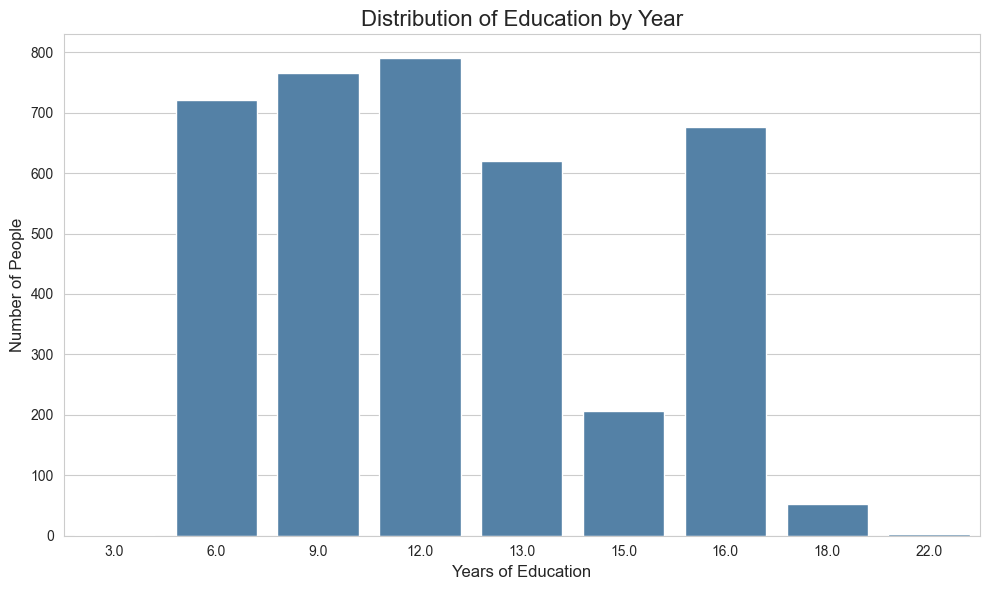

In [90]:
# 7. Education - Histogram
# Create a figure for the plot
plt.figure(figsize=(10, 6))

# Use countplot to create a bar for each unique year of education
sns.countplot(data=df_clean, x='education', color='steelblue')

# Set labels and title
plt.title('Distribution of Education by Year', fontsize=16)
plt.xlabel('Years of Education', fontsize=12)
plt.ylabel('Number of People', fontsize=12)

# Adjust layout and save the plot
plt.tight_layout()
plt.savefig('education_distribution_corrected.png')

In [66]:
df_clean['income/month'].describe()

count       3835.000
mean     1860492.047
std      2637821.751
min            0.000
25%       698000.000
50%      1500000.000
75%      2470000.000
max     90000000.000
Name: income/month, dtype: float64

In [84]:
bins = [
    0,         # < 500,000
    500000,    # 500,000 - 1,000,000
    1000000,   # 1,000,000 - 2,000,000
    2000000,   # 2,000,000 - 4,000,000
    5000000,
    10000000,
    20000000,
    np.inf 
]

labels = [
    '< 500,000',
    '500,000 - 1,000,000',
    '1,000,000 - 2,000,000',
    '2,000,000 - 5,000,000',
    '5,000,000 - 10,000,000',
    '10,000,000 - 20,000,000',
    '> 20,000,000'
]

df_income = pd.cut(df_clean['income/month'], bins=bins, labels=labels, right=False)

income_counts = df_income.value_counts().sort_index()
income_counts

income/month
< 500,000                   647
500,000 - 1,000,000         656
1,000,000 - 2,000,000      1124
2,000,000 - 5,000,000      1209
5,000,000 - 10,000,000      164
10,000,000 - 20,000,000      23
> 20,000,000                 12
Name: count, dtype: int64

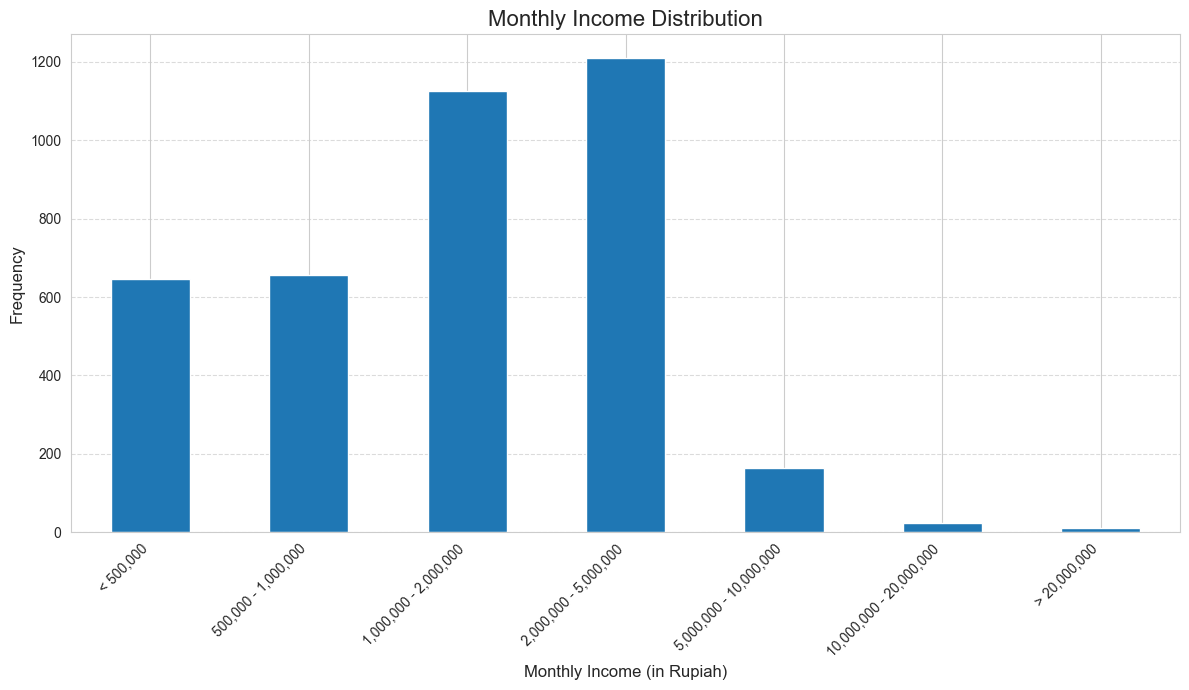

In [89]:
# Create a bar chart
plt.figure(figsize=(12, 7))
income_counts.plot(kind='bar')

# Set labels and title
plt.title('Monthly Income Distribution', fontsize=16)
plt.xlabel('Monthly Income (in Rupiah)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add a grid for easier reading
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to make sure labels are not cut off
plt.tight_layout()

# Save the plot
plt.savefig('income_distribution_bar_chart.png')

### Process

In [16]:
df = pd.read_csv('clean_data/data_clean.csv')

# Variabel Dependen: is_divorced
df['is_divorced'] = df['marstat'].apply(lambda x: 1 if x in ['Divorced', 'Separated'] else 0)
df = df[df['marstat']!= 'Widowed']

# Variabel Independen
df['income_log'] = np.log1p(df['income/month'])
df['age'] = df['age'].astype(int)
df['age_squared'] = df['age']**2
df['education'] = df['education'].astype(float)

# Pemrosesan Variabel Etnis
def clean_ethnicity(eth_str):
    try:
        eth_list = ast.literal_eval(eth_str)
        return eth_list[0] if eth_list else 'Other'
    except (ValueError, SyntaxError):
        return 'Other'

df['ethnicity_clean'] = df['ethnicity'].apply(clean_ethnicity)
top_ethnicities = ['Jawa', 'Sunda', 'Sasak', 'Minang', 'Bali', 'Batak', 'Betawi', 'Bugis', 'Banjar']
df['ethnicity_grouped'] = df['ethnicity_clean'].apply(lambda x: x if x in top_ethnicities else 'Other')

# Membuat variabel dummy untuk etnis, dengan etnis pertama sebagai referensi
ethnicity_dummies = pd.get_dummies(df['ethnicity_grouped'], prefix='eth', drop_first=True)
df = pd.concat([df, ethnicity_dummies], axis=1)

# Membuat variabel dummy untuk cara perjodohan, dengan nilai pertama sebagai referensi
partner_choice_dummies = pd.get_dummies(df['who_chose_your_partner'], prefix='choice', drop_first=True)
df = pd.concat([df, partner_choice_dummies], axis=1)

# ----------------- KODE PERBAIKAN DIMULAI DARI SINI -----------------

# 1. Definisikan prediktor dasar (non-dummy)
base_predictors = ['age', 'age_squared', 'education', 'income_log']

# 2. Ambil nama kolom dari DataFrame dummy yang sudah dibuat
ethnicity_cols = ethnicity_dummies.columns.tolist()
partner_choice_cols = partner_choice_dummies.columns.tolist()

# 3. Gabungkan semua prediktor menjadi satu daftar final
predictor_cols_final = base_predictors + ethnicity_cols + partner_choice_cols

print("Variabel prediktor yang digunakan dalam model:")
print(predictor_cols_final)
print("\n")


# 4. Memisahkan Data Berdasarkan Jenis Kelamin
df_male = df[df['sex'] == 'Male'].copy()
df_female = df[df['sex'] == 'Female'].copy()

# Konversi semua kolom boolean di df_male menjadi integer (0 dan 1)
for col in df_male.select_dtypes(include='bool').columns:
    df_male[col] = df_male[col].astype(int)

# Lakukan hal yang sama untuk df_female
for col in df_female.select_dtypes(include='bool').columns:
    df_female[col] = df_female[col].astype(int)


# 5. Mendefinisikan dan Menjalankan Model Regresi Logistik (FUNGSI YANG DIPERBAIKI)
def run_logistic_regression(data, dependent_var, predictors):
    """Fungsi untuk menjalankan regresi logistik dan menampilkan hasilnya."""
    # Pastikan tidak ada nilai NaN di kolom yang relevan
    data = data.dropna(subset=[dependent_var] + predictors)
    
    X = data[predictors]
    y = data[dependent_var]
    
    X = sm.add_constant(X, has_constant='add')
    
    logit_model = sm.Logit(y, X)
    result = logit_model.fit(disp=0)
    
    # Menghitung Odds Ratio dan Confidence Intervalnya
    params = result.params
    conf = result.conf_int()
    conf['Odds Ratio'] = params
    conf.columns = ['Lower CI', 'Upper CI', 'Odds Ratio']
    conf = np.exp(conf)
    
    summary_df = pd.DataFrame({
        'Coefficient (B)': result.params,
        'Std.Err.': result.bse,
        'P-value': result.pvalues.map('{:.4f}'.format)
    })
    summary_df = summary_df.join(conf)
    
    print(f"Pseudo R-squ.: {result.prsquared:.4f}")
    print(f"N: {int(result.nobs)}")
    print(summary_df)
    print("\n" + "="*50 + "\n")

# Menjalankan model untuk Pria
print("Hasil Regresi Logistik untuk Pria")
run_logistic_regression(df_male, 'is_divorced', predictor_cols_final)

# Menjalankan model untuk Wanita
print("Hasil Regresi Logistik untuk Wanita")
run_logistic_regression(df_female, 'is_divorced', predictor_cols_final)

Variabel prediktor yang digunakan dalam model:
['age', 'age_squared', 'education', 'income_log', 'eth_Banjar', 'eth_Batak', 'eth_Betawi', 'eth_Bugis', 'eth_Jawa', 'eth_Minang', 'eth_Other', 'eth_Sasak', 'eth_Sunda', 'choice_Parents', 'choice_Self']


Hasil Regresi Logistik untuk Pria
Pseudo R-squ.: 0.0353
N: 2496
                Coefficient (B)  Std.Err. P-value  Lower CI   Upper CI  \
const                 -2.576608  2.018168  0.2017  0.001456   3.970646   
age                    0.056029  0.081140  0.4899  0.902125   1.239938   
age_squared           -0.000477  0.001022  0.6410  0.997523   1.001528   
education             -0.091048  0.037802  0.0160  0.847776   0.983186   
income_log            -0.033334  0.036926  0.3667  0.899688   1.039812   
eth_Banjar            -0.366967  0.885395  0.6785  0.122174   3.928961   
eth_Batak             -1.321430  1.131945  0.2430  0.029013   2.452581   
eth_Betawi            -0.006188  0.725500  0.9932  0.239754   4.119642   
eth_Bugis          

### Process 2

In [2]:
df = pd.read_csv('clean_data/data_clean.csv')
df

,pidlink,marstat,age,sex,times_married,who_chose_your_partner,ethnicity,education,income/month,income/year
0,1245201,Married,30,Male,1.0,Other family member,['Nias'],9.0,800000.0,1200000.0
1,1290004,Married,29,Male,1.0,Self,['Nias'],6.0,400000.0,3000000.0
2,2010006,Married,24,Female,1.0,Parents,['Nias'],6.0,1500000.0,4700000.0
3,2020011,Married,22,Female,1.0,Parents,['Nias'],9.0,140000.0,600000.0
4,2050003,Married,28,Male,1.0,Parents,['Nias'],6.0,1600000.0,19200000.0
...,...,...,...,...,...,...,...,...,...,...
3830,321270006,Married,29,Male,1.0,Self,"['Bugis', 'Makassar']",12.0,2800000.0,359520000.0
3831,321280005,Married,42,Male,1.0,Self,['Bugis'],13.0,2000000.0,26000000.0
3832,321280008,Married,33,Male,1.0,Self,['Sasak'],16.0,30000000.0,33000000.0
3833,321280009,Married,32,Male,1.0,Self,['Makassar'],12.0,5000000.0,62500000.0


In [4]:
def clean_data(df):
    """
    Memuat dan membersihkan dataset dari file CSV.
    """
    # Membersihkan dan mengekstrak nilai pertama dari kolom 'ethnicity'
    def clean_ethnicity(x):
        try:
            # Menggunakan ast.literal_eval untuk mengubah string menjadi list
            eth_list = ast.literal_eval(x)
            if isinstance(eth_list, list) and len(eth_list) > 0:
                return eth_list[0]
            return 'Other'
        except (ValueError, SyntaxError):
            return 'Other'
    
    df['ethnicity_clean'] = df['ethnicity'].apply(clean_ethnicity)

    # Mengelompokkan suku minoritas ke dalam 'Other'
    top_ethnicities = df['ethnicity_clean'].value_counts().nlargest(6).index
    df['ethnicity_grouped'] = df['ethnicity_clean'].where(df['ethnicity_clean'].isin(top_ethnicities), 'Other')

    # Membuat variabel dependen biner 'is_divorced'
    # Mengecualikan 'Widowed'
    df = df[df['marstat']!= 'Widowed']
    df['is_divorced'] = df['marstat'].apply(lambda x: 1 if x == 'Divorced'else 0)

    # Membuat variabel log_income, menangani pendapatan nol atau negatif
    df['income/month'] = pd.to_numeric(df['income/month'], errors='coerce')
    df.dropna(subset=['income/month'], inplace=True)
    df['log_income'] = df['income/month'].apply(lambda x: np.log(x) if x > 0 else 0)

    # Mengubah 'sex' menjadi numerik
    df['sex_numeric'] = df['sex'].apply(lambda x: 1 if x == 'Female' else 0)

    return df

df_clean = clean_data(df)
df_clean


C:\Users\ideap\AppData\Local\Temp\ipykernel_67100\3265602282.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_divorced'] = df['marstat'].apply(lambda x: 1 if x == 'Divorced'else 0)
C:\Users\ideap\AppData\Local\Temp\ipykernel_67100\3265602282.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['income/month'] = pd.to_numeric(df['income/month'], errors='coerce')
C:\Users\ideap\AppData\Local\Temp\ipykernel_67100\3265602282.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

,pidlink,marstat,age,sex,times_married,who_chose_your_partner,ethnicity,education,income/month,income/year,ethnicity_clean,ethnicity_grouped,is_divorced,log_income,sex_numeric
0,1245201,Married,30,Male,1.0,Other family member,['Nias'],9.0,800000.0,1200000.0,Nias,Other,0,13.592367,0
1,1290004,Married,29,Male,1.0,Self,['Nias'],6.0,400000.0,3000000.0,Nias,Other,0,12.899220,0
2,2010006,Married,24,Female,1.0,Parents,['Nias'],6.0,1500000.0,4700000.0,Nias,Other,0,14.220976,1
3,2020011,Married,22,Female,1.0,Parents,['Nias'],9.0,140000.0,600000.0,Nias,Other,0,11.849398,1
4,2050003,Married,28,Male,1.0,Parents,['Nias'],6.0,1600000.0,19200000.0,Nias,Other,0,14.285514,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3830,321270006,Married,29,Male,1.0,Self,"['Bugis', 'Makassar']",12.0,2800000.0,359520000.0,Bugis,Other,0,14.845130,0
3831,321280005,Married,42,Male,1.0,Self,['Bugis'],13.0,2000000.0,26000000.0,Bugis,Other,0,14.508658,0
3832,321280008,Married,33,Male,1.0,Self,['Sasak'],16.0,30000000.0,33000000.0,Sasak,Sasak,0,17.216708,0
3833,321280009,Married,32,Male,1.0,Self,['Makassar'],12.0,5000000.0,62500000.0,Makassar,Other,0,15.424948,0


In [10]:
# -----------------------------------------------------------------------------
# 2. FUNGSI UNTUK MENJALANKAN ANALISIS
# -----------------------------------------------------------------------------

def run_logistic_regression(df, formula):
    """
    Menjalankan model regresi logistik menggunakan statsmodels.
    """
    model = sm.Logit.from_formula(formula, data=df)
    result = model.fit(disp=0) # disp=0 untuk menekan output konvergensi
    return result

def perform_full_analysis(df_clean):
    """
    Menjalankan seluruh alur analisis dari pembersihan data hingga pemodelan.
    """
    df_clean['choice_is_self'] = df_clean['who_chose_your_partner'].apply(lambda x: 1 if x == 'Self' else 0)
    
    # Langkah 2: Definisikan formula model
    # Referensi: Pilihan Sendiri ('Self'), Suku Jawa ('Jawa')
    formula_base = "is_divorced ~ log_income + education + age + choice_is_self + C(ethnicity_grouped, Treatment(reference='Jawa'))"
    formula_combined = f"{formula_base} + sex_numeric"

    # Langkah 3: Pisahkan data untuk analisis terstratifikasi
    # Menggunakan.copy() untuk menghindari SettingWithCopyWarning
    df_male = df_clean[df_clean['sex'] == 'Male'].copy()
    df_female = df_clean[df_clean['sex'] == 'Female'].copy()

    # Langkah 4: Jalankan semua model
    result_combined = run_logistic_regression(df_clean, formula_combined)
    result_male = run_logistic_regression(df_male, formula_base)
    result_female = run_logistic_regression(df_female, formula_base)

    # Langkah 5: Tampilkan ringkasan hasil
    print("--- HASIL REGRESI LOGISTIK (RINGKASAN STATSMODELS) ---")
    print("\n--- Model Gabungan (Laki-laki dan Perempuan) ---")
    print(result_combined.summary())
    print("\n--- Model Laki-laki ---")
    print(result_male.summary())
    print("\n--- Model Perempuan ---")
    print(result_female.summary())

    return result_combined, result_male, result_female

In [11]:
result_combined, result_male, result_female = perform_full_analysis(df_clean)

--- HASIL REGRESI LOGISTIK (RINGKASAN STATSMODELS) ---

--- Model Gabungan (Laki-laki dan Perempuan) ---
                           Logit Regression Results                           
Dep. Variable:            is_divorced   No. Observations:                 3801
Model:                          Logit   Df Residuals:                     3789
Method:                           MLE   Df Model:                           11
Date:                Wed, 24 Sep 2025   Pseudo R-squ.:                 0.05035
Time:                        10:00:59   Log-Likelihood:                -505.93
converged:                       True   LL-Null:                       -532.75
Covariance Type:            nonrobust   LLR p-value:                 1.369e-07
                                                                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
Interce

C:\Users\ideap\AppData\Local\Temp\ipykernel_67100\2691105447.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['choice_is_self'] = df_clean['who_chose_your_partner'].apply(lambda x: 1 if x == 'Self' else 0)
c:\Programming\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


c:\Programming\Lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: overflow encountered in exp
  result = func(self.values, **kwargs)


--- VISUALISASI HASIL REGRESI LOGISTIK ---


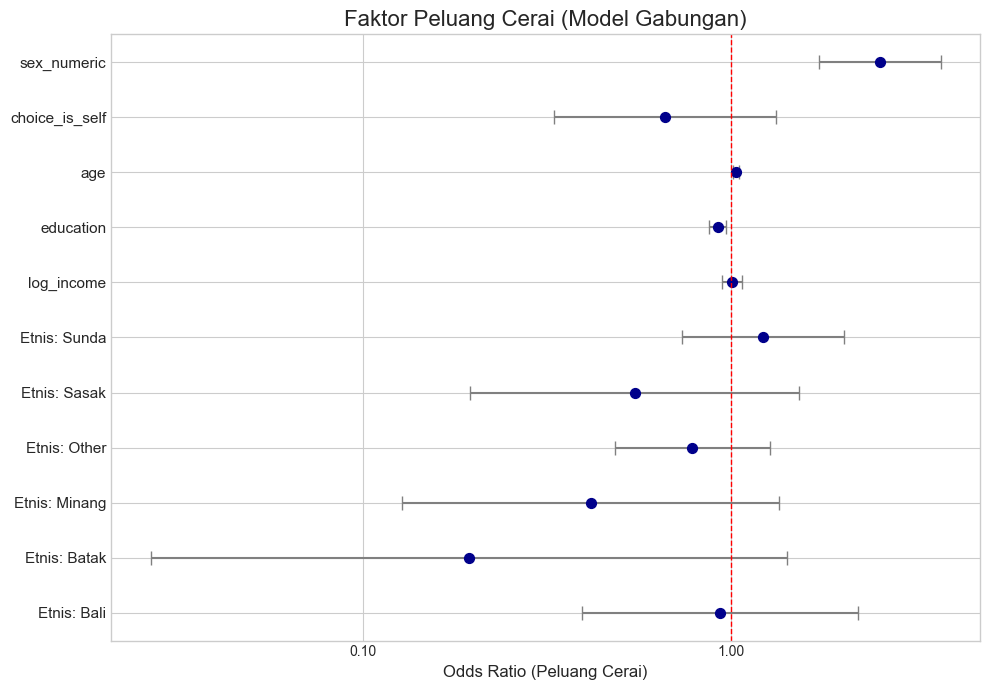

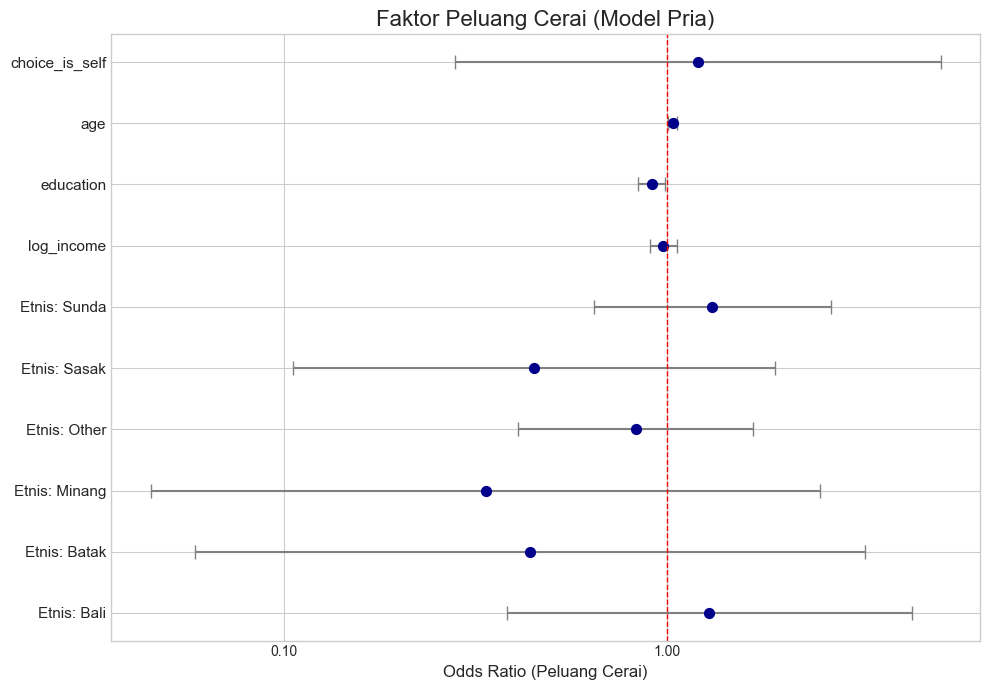

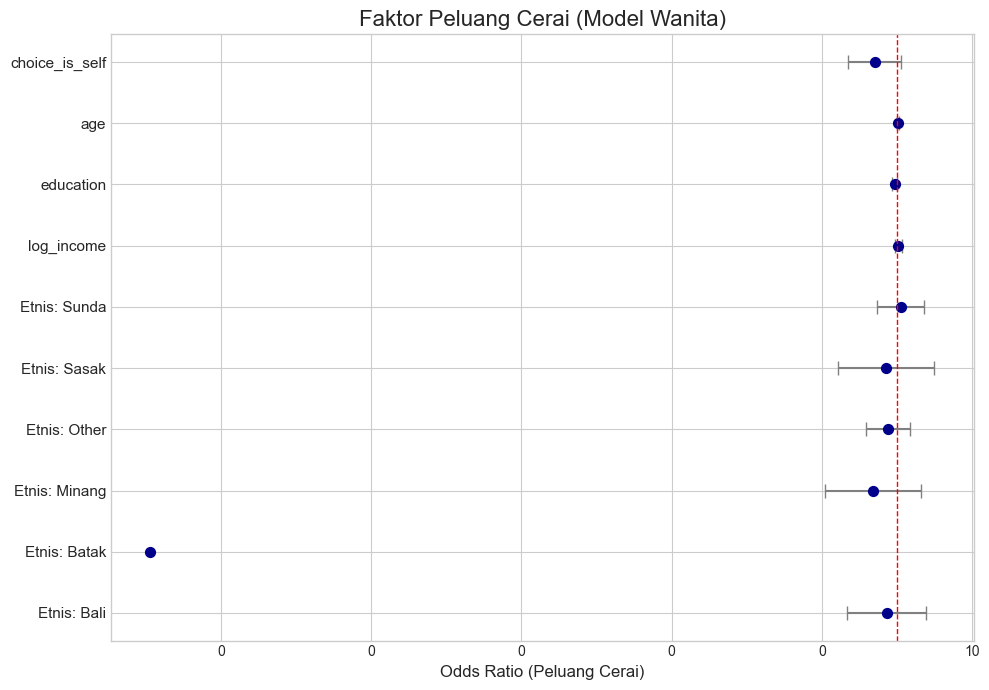

In [12]:
def extract_odds_ratios(result, model_name):
    """
    Fungsi untuk mengekstrak odds ratio dan confidence interval dari hasil model.
    """
    # Ambil parameter dan confidence interval
    params = result.params.copy()
    conf = result.conf_int().copy()
    
    # Gabungkan menjadi satu DataFrame
    df_res = pd.concat([params, conf], axis=1)
    df_res.columns = ['coef', 'ci_lower', 'ci_upper']
    
    # Hitung Odds Ratio dengan eksponensial
    df_odds = np.exp(df_res)
    df_odds.columns = ['Odds Ratio', 'CI Lower', 'CI Upper']
    df_odds['Model'] = model_name
    
    # Hapus intercept karena biasanya tidak divisualisasikan
    df_odds = df_odds.drop('Intercept')
    
    # Membersihkan nama variabel agar lebih mudah dibaca di grafik
    df_odds.index = df_odds.index.str.replace("C(ethnicity_grouped, Treatment(reference='Jawa'))[T.", "Etnis: ")
    df_odds.index = df_odds.index.str.replace("]", "")
    
    return df_odds

# Ekstrak data dari ketiga model
odds_combined = extract_odds_ratios(result_combined, 'Gabungan')
odds_male = extract_odds_ratios(result_male, 'Pria')
odds_female = extract_odds_ratios(result_female, 'Wanita')

def plot_odds_ratios(df_odds, title):
    """
    Fungsi untuk membuat plot Odds Ratio.
    """
    # Siapkan data untuk plot
    df_plot = df_odds.reset_index().rename(columns={'index': 'Variabel'})
    
    # Hitung error untuk garis confidence interval
    df_plot['error'] = df_plot['CI Upper'] - df_plot['CI Lower']
    
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, ax = plt.subplots(figsize=(10, 7))

    # Plot titik Odds Ratio
    ax.scatter(x=df_plot['Odds Ratio'], y=df_plot['Variabel'], s=50, color='darkblue', zorder=2)
    
    # Plot garis confidence interval (error bars)
    ax.errorbar(x=df_plot['Odds Ratio'], y=df_plot['Variabel'], 
                xerr=((df_plot['Odds Ratio'] - df_plot['CI Lower']), (df_plot['CI Upper'] - df_plot['Odds Ratio'])),
                fmt='none', color='gray', capsize=5, zorder=1)

    # Tambahkan garis vertikal di Odds Ratio = 1 (titik referensi 'tidak ada efek')
    ax.axvline(x=1, linestyle='--', color='red', lw=1)
    
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Odds Ratio (Peluang Cerai)', fontsize=12)
    ax.set_ylabel('')
    ax.tick_params(axis='y', labelsize=11)
    
    # Menggunakan skala log untuk interpretasi yang lebih baik
    # Jarak dari 0.5 ke 1 sama dengan jarak dari 1 ke 2
    ax.set_xscale('log')
    ax.get_xaxis().set_major_formatter(plt.ScalarFormatter()) # Tampilkan angka normal
    plt.tight_layout()
    plt.show()

# Buat visualisasi untuk setiap model
print("--- VISUALISASI HASIL REGRESI LOGISTIK ---")
plot_odds_ratios(odds_combined, 'Faktor Peluang Cerai (Model Gabungan)')
plot_odds_ratios(odds_male, 'Faktor Peluang Cerai (Model Pria)')
plot_odds_ratios(odds_female, 'Faktor Peluang Cerai (Model Wanita)')